In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rc, rcParams

Dataset: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

In [2]:
# reading data from the csv file
df= pd.read_csv("2019_nCoV_data.csv")
# data clean
df.drop("Sno", axis=1, inplace=True)
df.drop("Last Update", axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].apply(lambda x:x.date())
df.loc[df['Country']=='Mainland China','Country']='China'
df.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,China,1.0,0.0,0.0
1,2020-01-22,Beijing,China,14.0,0.0,0.0
2,2020-01-22,Chongqing,China,6.0,0.0,0.0
3,2020-01-22,Fujian,China,1.0,0.0,0.0
4,2020-01-22,Gansu,China,0.0,0.0,0.0


In [3]:
df.tail()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
1714,2020-02-17,"Madison, WI",US,1.0,0.0,0.0
1715,2020-02-17,"Orange, CA",US,1.0,0.0,0.0
1716,2020-02-17,"San Antonio, TX",US,1.0,0.0,0.0
1717,2020-02-17,"Seattle, WA",US,1.0,0.0,1.0
1718,2020-02-17,"Tempe, AZ",US,1.0,0.0,0.0


In [4]:
#listing all the countries where the virus has spread
country_list=list(df['Country'].unique())
print(country_list)

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium', 'Others', 'Egypt']


In [5]:
df_stat = df.groupby(['Date']).sum().reset_index(drop=None)
df_stat['daily_confirmed_cases']=df_stat.Confirmed.diff()
df_stat['daily_deaths']=df_stat.Deaths.diff()
df_stat['daily_recoveries']=df_stat.Recovered.diff()
df_stat

,Date,Confirmed,Deaths,Recovered,daily_confirmed_cases,daily_deaths,daily_recoveries
0,2020-01-22,555.0,0.0,0.0,NaN,NaN,NaN
1,2020-01-23,653.0,18.0,30.0,98.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0,288.0,8.0,6.0
3,2020-01-25,2019.0,56.0,49.0,1078.0,30.0,13.0
4,2020-01-26,2794.0,80.0,54.0,775.0,24.0,5.0
5,2020-01-27,4473.0,107.0,63.0,1679.0,27.0,9.0
6,2020-01-28,6057.0,132.0,110.0,1584.0,25.0,47.0
7,2020-01-29,7783.0,170.0,133.0,1726.0,38.0,23.0
8,2020-01-30,9776.0,213.0,187.0,1993.0,43.0,54.0
9,2020-01-31,11374.0,259.0,252.0,1598.0,46.0,65.0


Text(0.5, 0, 'Dates')

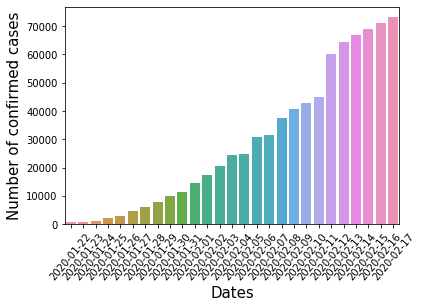

In [6]:
#plotting a bar chart of confirmed cases over time
sns.axes_style("whitegrid")
sns.barplot(x="Date", y="Confirmed", data=df_stat)
plt.xticks(rotation=50)
plt.ylabel('Number of confirmed cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


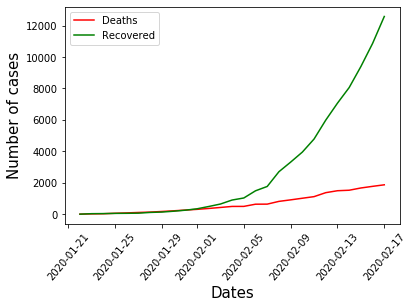

In [7]:
#plotting two line plots for deaths and recoveries respectively
plt.plot('Date', 'Deaths', data=df_stat, color='red')
plt.plot('Date', 'Recovered', data=df_stat, color='green')
plt.xticks(rotation=50)
plt.ylabel('Number of cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)
plt.legend()
plt.show()

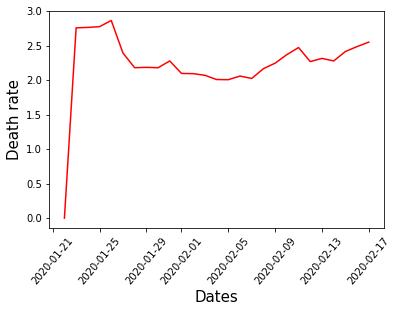

In [20]:
df_stat['death_rate']=df_stat.apply(lambda x: x['Deaths']*100/(x['Confirmed']), axis=1)
plt.plot('Date','death_rate',data=df_stat, color='red')
plt.xticks(rotation=50)
plt.ylabel('Death rate',fontsize=15)
plt.xlabel('Dates',fontsize=15)
plt.show()